In [1]:
from tdw.controller import Controller
from tdw.tdw_utils import TDWUtils
from tdw.add_ons.third_person_camera import ThirdPersonCamera
from typing import Dict
from tdw.add_ons.collision_manager import CollisionManager
from tdw.add_ons.object_manager import ObjectManager

# Added for video
from tdw.add_ons.image_capture import ImageCapture
from tdw.backend.paths import EXAMPLE_CONTROLLER_OUTPUT_PATH
from os import chdir, system
from subprocess import call
import shutil

# Added for collisions
import random
import numpy as np

# From &tdw_physics
from typing import List, Dict
from tdw.librarian import ModelLibrarian
from typing import Dict
from controllers.helpers.helpers import ObjectInfo, get_random_avatar_position
from controllers.helpers.objects import *

In [137]:
''' Do not remove '''
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
lib = ModelLibrarian('models_core.json')
# Concatenate the ALL lists
objects = CONTAINERS + CONTAINED + OCCLUDERS + OCCLUDERS_SEE_THROUGH + OCCLUDED +\
                ROLLING_FLIPPED + BALLS

# Remove duplicates, while preserving order
# See https://stackoverflow.com/questions/480214/how-do-i-remove-duplicates-from-a-list-while-preserving-order
objects = list(dict.fromkeys(objects))
print(len(objects))
df = pd.DataFrame(
{'names': [record.name for record in lib.records if record.name in objects],
    'scales' :[TDWUtils.get_unit_scale(record) for record in lib.records if record.name in objects],
'volume' : [np.prod(TDWUtils.get_bounds_extents(record.bounds)) for record in lib.records if record.name in objects],}
)
df = df.sort_values(by="volume", ignore_index=True)
df

97


,names,scales,volume
0,aaa_battery,20.216037,0.000005
1,chocolate_bar001,19.654760,0.000008
2,b03_pen_01_001,9.177869,0.000012
3,b03_pen,6.405872,0.000018
4,9v_battery,19.053041,0.000025
...,...,...,...
92,699264_shoppingcart_2013,1.004450,0.667224
93,b03_shopping_cart_walmart,0.845367,0.784615
94,b03_ka90ivi20r_2013__vray,0.565877,1.109487
95,balance_double_doghouse,0.845467,1.116060


15.000049465689893 56.723865354645326


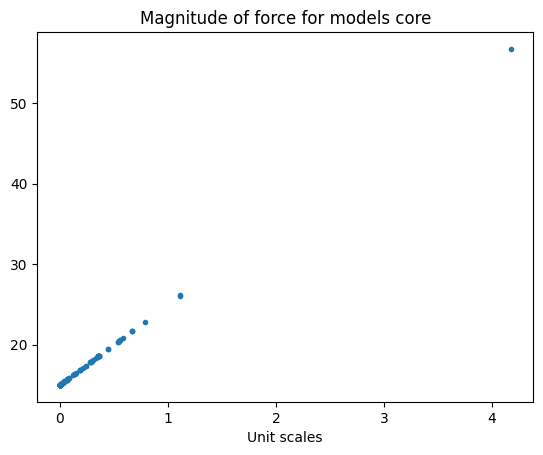

In [214]:
i, j = 0, 97
magnitude = df['volume'][i:j]*10+15
print(np.min(magnitude), np.max(magnitude))
plt.plot(df['volume'][i:j], magnitude,'.', label='unit_scale')

plt.title('Magnitude of force for models core')
plt.xlabel('Unit scales')
plt.show()

14.567926691799244 53.90663082329455


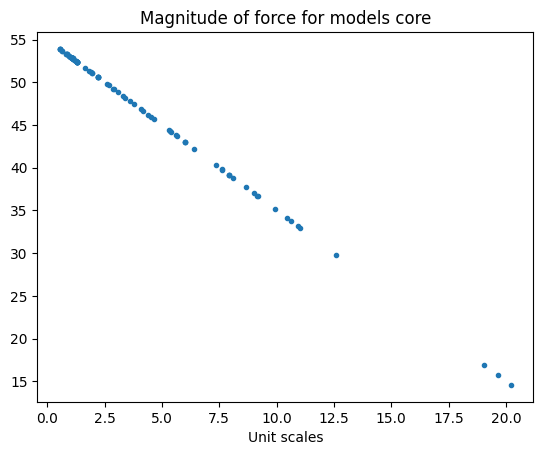

In [221]:
i, j = 0, 97
magnitude = -df['scales'][i:j]*2+55
print(np.min(magnitude), np.max(magnitude))

plt.plot(df['scales'][i:j], magnitude,'.', label='unit_scale')

plt.title('Magnitude of force for models core')
plt.xlabel('Unit scales')
plt.show()

In [1]:
i, j = 0, 97

plt.plot(range(i, j) , df['scales'][i:j], label='Unit scale')
plt.plot(range(i, j) , df['volume'][i:j], label='Product xyz bounds extends')
magnitude = (-df['scales'][i:j]*2+55)/2+(df['volume'][i:j]*10+15)/2 - 5
# magnitude = ((-(np.array(df['scales'][i:j]))*a + np.array(df['volume'][i:j])*b)+ bias)*2
print(f'Lowest magnitude is {np.min(magnitude)} and highest is {np.max(magnitude)}')
plt.plot(range(i, j) ,magnitude, color='red', linestyle='-', label=f'Magnitude mean')

magnitude = ((-df['scales'][i:j]*2+55)+(df['volume'][i:j]*10+15))/2 
# magnitude = ((-(np.array(df['scales'][i:j]))*a + np.array(df['volume'][i:j])*b)+ bias)*2
print(f'Lowest magnitude is {np.min(magnitude)} and highest is {np.max(magnitude)}')
plt.plot(range(i, j) ,magnitude, color='gray', linestyle='dashed', label=f'Random magnitude min-max (for 5)')

magnitude = ((-df['scales'][i:j]*2+55)+(df['volume'][i:j]*10+15))/2 -10
# magnitude = ((-(np.array(df['scales'][i:j]))*a + np.array(df['volume'][i:j])*b)+ bias)*2
print(f'Lowest magnitude is {np.min(magnitude)} and highest is {np.max(magnitude)}')
plt.plot(range(i, j) ,magnitude, color='gray', linestyle='dashed')




plt.title('Magnitude of force for selected models from models_core.json library')
plt.legend()
plt.xlabel('Objects')
plt.savefig('magnitude.png')
plt.show()

NameError: name 'plt' is not defined

In [9]:
lib = ModelLibrarian('models_core.json')
records = {record.name:i for i, record in enumerate(lib.records)}
record = lib.records[293]

In [11]:
from tdw.tdw_utils import TDWUtils
print(record.bounds)


{'back': {'x': -1.490116e-08, 'y': 0.04704352, 'z': -0.04254311}, 'bottom': {'x': -1.490116e-08, 'y': 0, 'z': -3.72529e-09}, 'center': {'x': -1.490116e-08, 'y': 0.04704352, 'z': -3.72529e-09}, 'front': {'x': -1.490116e-08, 'y': 0.04704352, 'z': 0.0425431}, 'left': {'x': -0.05559815, 'y': 0.04704352, 'z': -3.72529e-09}, 'right': {'x': 0.05559812, 'y': 0.04704352, 'z': -3.72529e-09}, 'top': {'x': -1.490116e-08, 'y': 0.09408703, 'z': -3.72529e-09}}


In [49]:
o_position = [3,4,5]
{"x": random.uniform(o_position[0]-10, o_position[0]+10), 
                                                    "y": o_position[1], 
                                                    "z": random.uniform(o_position[2]-10, o_position[2]+10)},

({'x': -3.1357168585432498, 'y': 4, 'z': 4.0989153721882055},)

In [22]:
width_x, height_y, width_z = TDWUtils.get_b{"x": random.uniform(-10, 10), "y": 0, "z": random.uniform(-10, 10)},ounds_extents(record.bounds)

0.11119627


In [14]:
# Calculate height and width of occluder #TODO check this formula
height_occl = abs(record.bounds['top']['y'] - record.bounds['bottom']['y'])

#NOTE TODO Somehow width is often 0
width_occl = abs(record.bounds['left']['z'] - record.bounds['right']['z'])
print(width_occl)

0.0


In [8]:
OBJECTS = ["fanta_orange_can_12_fl_oz_vray",
               "hexagonal_toy",
               "b03_sphere_chocolate",
               "coca-cola_can_001",
               "b05_baseballnew_v03_12",
               "b06_green_new",
               "star_wood_block",
               "amphora_jar_vase",
               "b03_burger",
               "golf",
               "dice",
               "apple",
               "wine_bottle",
               "jug01",
               "b03_723329_croissant",
               "moet_chandon_bottle_vray",
               "b04_banana",
               "b04_orange_00",
               "orange",
               "vm_v2_015",
               "b03_dice",
               "bread_02",
               "bread_01"]
for record in lib.records:
    if record.name in OBJECTS:
        print('"'+record.name+ '"')

"amphora_jar_vase"
"apple"
"b03_burger"
"b04_banana"
"b04_orange_00"
"golf"
"hexagonal_toy"
"jug01"
"moet_chandon_bottle_vray"
"orange"
"star_wood_block"


In [13]:
print(lib.records[120].__dict__.keys())
lib.records[120].__dict__['bounds']

dict_keys(['name', 'urls', 'wnid', 'wcategory', 'scale_factor', 'do_not_use', 'do_not_use_reason', 'flex', 'substructure', 'bounds', 'canonical_rotation', 'physics_quality', 'asset_bundle_sizes', 'composite_object', 'volume', 'container_shapes', 'affordance_points'])


{'back': {'x': 1.490116e-07, 'y': 0.4671669, 'z': -0.2698637},
 'bottom': {'x': 1.490116e-07, 'y': -5.960464e-08, 'z': 0},
 'center': {'x': 1.490116e-07, 'y': 0.4671669, 'z': 0},
 'front': {'x': 1.490116e-07, 'y': 0.467167, 'z': 0.2698637},
 'left': {'x': -0.2926708, 'y': 0.4671669, 'z': 0},
 'right': {'x': 0.2926711, 'y': 0.4671669, 'z': 0},
 'top': {'x': 1.490116e-07, 'y': 0.9343339, 'z': 0}}

: 

In [24]:
import pandas as pd
df = pd.read_csv('/Users/meesmeester/Documents/Github/tdw_trials/data/temp/info.csv')
df.shape

(5, 18)

In [12]:
import numpy as np
x = np.array([[1,2,3],[3,4,5],[6,7,8]])

In [20]:
print(x)
print(np.unique(x))
set({1,2,3}) | set(np.unique(x))

[[1 2 3]
 [3 4 5]
 [6 7 8]]
[1 2 3 4 5 6 7 8]


{1, 2, 3, 4, 5, 6, 7, 8}

In [ ]:
# For checking trial
from PIL import Image
import os
from skimage import color, measure

# file_names = os.listdir(self.path_frames)
# file_names.sort()
# fn = self.path_frames+'/'+[fn for fn in file_names if fn[:5] == 'mask_'][0]

fn = 'id_0002.png'
# NOTE: rgb2gray might also be wrong
img = np.asarray(color.rgb2gray(Image.open(fn)))

# Occluder is occluding one of the sides of the view, or one of the moving objects is already seeable
if img[:,0].any() or img[:,-1].any():
    resp = self.communicate([])
    # Sometimes we get TypeError: 'NoneType' object is not iterable, when trying to get the transforms
    print(f'Occluder might be covering too much...', 'error')
    trial_success = False

ModuleNotFoundError: No module named 'skimage'